In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import os 
import numpy as np
import netCDF4 as nc
import datetime as dt

import cartopy
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle

# credit to T Jarnikova for code - thanks!

In [62]:
# nanoose stn obs data
folder_path = "C:\\temp\\nanoose_prepped\\CTD"  

i = 0
excld = 0
outlr = 0
datasets = []

for file_name in os.listdir(folder_path):
    if file_name.endswith(".nc"):
        
        full_file_path = folder_path + "\\" + file_name
        obs = xr.open_dataset(full_file_path)
        obs_coord = obs.get(['latitude','longitude'])
        
        # filter outliers and year
        if obs_coord['latitude'] > 49.45:
            print("found outlier")
            print(full_file_path)
            outlr += 1
        elif obs_coord['latitude'] < 49.2:
            print("found outlier")
            print(full_file_path)
            outlr += 1
        elif obs['time'].dt.year < 1979:
            excld += 1
        elif obs['time'].dt.year > 2018:
            excld += 1
        else:
            # fix positive lons
            if obs_coord['longitude'] > 0:
                obs_coord['longitude'] = obs_coord['longitude'] * -1
            datasets.append(obs_coord)
            i += 1
        
all_obs_coords = xr.concat(datasets, dim='single')
print(str(i) + " coords found within date range.")
print(str(excld) + " records excluded")
print(str(outlr) + " outliers excluded")

found outlier
C:\temp\nanoose_prepped\CTD\Nanoose_100_CastCTD_1977-10-27_0700h.nc
found outlier
C:\temp\nanoose_prepped\CTD\Nanoose_152_CastCTD_1971-10-01_1619h.nc
found outlier
C:\temp\nanoose_prepped\CTD\Nanoose_161_CastCTD_1971-10-29_1625h.nc
4119 coords found within date range.
1570 records excluded
3 outliers excluded


In [65]:
all_obs_coords.mean()

<xarray.Dataset>
Dimensions:    ()
Data variables:
    latitude   float32 49.33
    longitude  float32 -124.0

In [ ]:
# model meshmask - NOT WORKING
f = "..//data//mesh mask//mesh_mask_20210406.nc"

meshmask = xr.open_dataset(f)

meshmask['nav_lat'].stack(z=('x', 'y')).reset_index('z')

C:\Users\Greig\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Greig\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


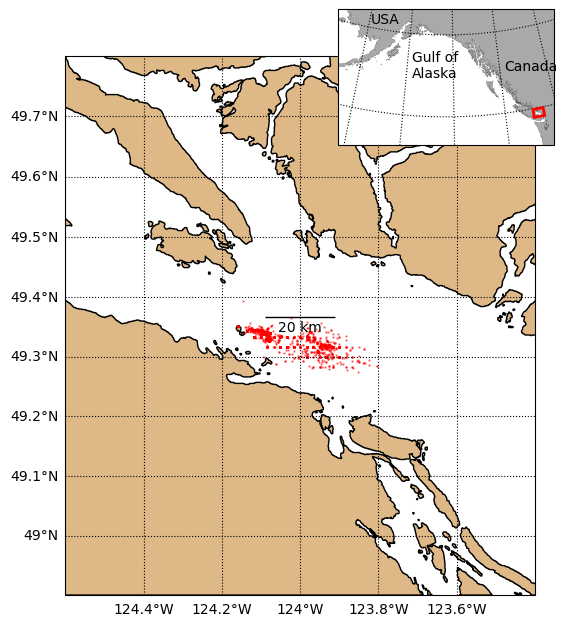

In [66]:
alpha = 0.5 # for point transparency - GO
markersize = 0.7
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
scalebar = AnchoredSizeBar(ax.transData,
                           20000, '20 km', 'center', 
                           pad=0.1,
                           color='black',
                           frameon=False,
                           size_vertical=1)

subdomain = [114, 397, 334, 897]
fig = plt.figure(figsize=(9, 7))
gs = plt.GridSpec(1, 1)#, width_ratios=[1.8, 1], wspace=0.13)

# Map Left
xlim, ylim = [-124.6, -123.4], [48.9, 49.8]
ax = fig.add_subplot(gs[0], projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#full (low for easy render)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='burlywood'))

xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
xlocs = [-123, -123.2, -123.4, -123.6, -123.8, -124, -124.2, -124.4, -124.6, -124.8, -125]
ylocs = [49, 49.1, 49.2, 49.3, 49.4, 49.5, 49.6, 49.7, 49.8, 49.9, 50]

gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

ax.add_artist(scalebar)

# ax.text(0.15, 0.1, 'Pacific\nOcean', weight='bold', fontsize = 12, transform=ax.transAxes)
# ax.text(0.32, 0.307, 'Juan de Fuca', weight='bold', transform=ax.transAxes, rotation=-19.5)
# ax.text(0.555, 0.305, 'Strait', weight='bold', transform=ax.transAxes, rotation=10.5)
# ax.text(0.82, 0.18, 'Puget\nSound', weight='bold', transform=ax.transAxes)

# ax.text(0.355, 0.4851, 'Strait of Georgia', weight='bold', transform=ax.transAxes, rotation=-30, color='w')
# #ax.text(0.010, 0.755, 'Johnstone', weight='bold', transform=ax.transAxes, rotation=-20)
# ax.text(0.015, 0.740, 'Johnstone \n Strait ', weight='bold', transform=ax.transAxes, rotation=-0)
# #ax.text(0.16, 0.675, 'Strait', weight='bold', transform=ax.transAxes, rotation=-60)

# ax.text(0.44, 0.38, 'Haro\nStrait', weight='bold', transform=ax.transAxes)
# ax.text(0.72, 0.55, 'Fraser\nRiver', weight='bold', transform=ax.transAxes)
# ax.text(0.35, 0.9, 'Bute Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.42, 0.80, 'Toba Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.53, 0.75, 'Jervis Inlet', weight='bold', transform=ax.transAxes)
# ax.text(0.60, 0.67, 'Howe Sound', weight='bold', transform=ax.transAxes)
# ax.text(0.11, 0.64, 'Texada Island', weight='bold',fontstyle="italic", 
#         color = 'k', fontsize = 10, transform=ax.transAxes)

# obs
ax.plot(all_obs_coords['longitude'][:], all_obs_coords['latitude'][:], 'ro', transform=crs.PlateCarree(), alpha=alpha, markersize=markersize)
# model grid
#ax.plot(meshmask['nav_lon'].stack(z=('x', 'y')).reset_index('z'), meshmask['nav_lat'].stack(z=('x', 'y')).reset_index('z'), 'go', transform=crs.PlateCarree())

#Map Inset
xmap, ymap = [-161, -122], [45, 62]
ax2 = fig.add_axes([0.555, 0.75, 0.24, 0.2], projection=crs.LambertConformal(np.mean(xmap), np.mean(ymap)))
ax2.set_extent(xmap + ymap)
ax2.add_feature(feature.GSHHSFeature('low', edgecolor='k', facecolor='darkgray', linewidth=0.1))
ax2.add_patch(Rectangle(
    (xlim[0], ylim[0]), int(np.diff(xlim))+1, int(np.diff(ylim))+1,
    transform=crs.PlateCarree(), fill=False, edgecolor='r', zorder=10, linewidth=2
))

ax2.text(0.34, 0.5, 'Gulf of\nAlaska', transform=ax2.transAxes)
ax2.text(0.77, 0.55, 'Canada', transform=ax2.transAxes)
ax2.text(0.15, 0.9, 'USA', transform=ax2.transAxes)

xticks, yticks = list(range(-170, -100, 10)), list(range(40, 80, 10))
ax2.gridlines(linestyle=":", color='k', xlocs=xticks, ylocs=yticks)
ax2.xaxis.set_major_formatter(LONGITUDE_FORMATTER) 
ax2.yaxis.set_major_formatter(LATITUDE_FORMATTER)
fig.canvas.draw()

#ax.set_title('Nanoose CTD observation location (red) \n on standard Salish Sea map',zorder = 100)

#lct.lambert_xticks(ax, xticks)
#lct.lambert_yticks(ax, yticks)

# # Colorbar
# cax = fig.add_axes([0.15, 0.06, 0.73, 0.025])
# fig.colorbar(c, cax=cax, orientation='horizontal', label='surface diatom concentration (mmol N m$^{-3}$)')

# fig.savefig('./paper_figs/MF01-domain.jpg', bbox_inches='tight', dpi = 300)

In [115]:
all_obs_coords['latitude'][:].min()

<xarray.DataArray 'latitude' ()>
array(49.13333511)

In [80]:
meshmask['nav_lon'][1]

<xarray.DataArray 'nav_lon' (x: 132)>
array([-123.43503 , -123.41944 , -123.403725, -123.38793 , -123.37211 ,
       -123.356255, -123.340385, -123.32451 , -123.30862 , -123.292725,
       -123.27682 , -123.26092 , -123.245   , -123.22909 , -123.21317 ,
       -123.19725 , -123.18133 , -123.165405, -123.14948 , -123.13355 ,
       -123.11763 , -123.1017  , -123.08577 , -123.06984 , -123.0539  ,
       -123.03797 , -123.02203 , -123.0061  , -122.990166, -122.97423 ,
       -122.9583  , -122.94236 , -122.92642 , -122.910484, -122.89454 ,
       -122.8786  , -122.86266 , -122.846725, -122.83078 , -122.81484 ,
       -122.798904, -122.78296 , -122.76702 , -122.751076, -122.73514 ,
       -122.71919 , -122.70325 , -122.68731 , -122.671364, -122.65542 ,
       -122.63948 , -122.623535, -122.60759 , -122.591644, -122.57571 ,
       -122.55976 , -122.543816, -122.52787 , -122.511925, -122.49598 ,
       -122.480034, -122.46409 , -122.44814 , -122.4322  , -122.41625 ,
       -122.40031 , -122.38436 , -122.368416, -122.35247 , -122.336525,
       -122.32058 , -122.304634, -122.28869 , -122.27274 , -122.2568  ,
       -122.24085 , -122.2249  , -122.208954, -122.19301 , -122.17706 ,
       -122.16112 , -122.14517 , -122.12923 , -122.11327 , -122.09733 ,
       -122.08138 , -122.06544 , -122.04949 , -122.03354 , -122.01759 ,
       -122.00165 , -121.9857  , -121.96975 , -121.953804, -121.93786 ,
       -121.92191 , -121.90596 , -121.890015, -121.87407 , -121.85812 ,
       -121.84217 , -121.826225, -121.81028 , -121.794334, -121.77838 ,
       -121.762436, -121.74649 , -121.73054 , -121.71459 , -121.69865 ,
       -121.6827  , -121.66675 , -121.6508  , -121.63486 , -121.618904,
       -121.60296 , -121.58701 , -121.57106 , -121.555115, -121.53917 ,
       -121.52322 , -121.50727 , -121.491325, -121.47537 , -121.45943 ,
       -121.44348 , -121.42753 , -121.41158 , -121.39564 , -121.379684,
       -121.36374 , -121.34779 ], dtype=float32)
Dimensions without coordinates: x